# Универсальные методы интегрирования одномерного уравнения переноса

Это методы, которые применимы к уравнениям в частных производных произвольного типа:
* Конечные разности
* Спектральные (Фурье и Эрмита)
* Конечные элементы

Метод конечных разностей рассмотрели на предыдущей лекции.

## Спектральные методы

$$
\frac{\partial f}{\partial t} + v(x,t) \frac{\partial f}{\partial x} = 0
$$

* $v$ не зависит явно от $f$ — можно рассматривать уравнение как линейное

* Идея: разложить по ортогональному набору функций (в спектр), тогда дифференциальное уравнение в частных производных заменится обыкновенным дифференциальным уравнением для образов

* Можно обобщить и на нелинейный случай

### Некоторые определения

* Базисные (пробные) функции:
$$
\left(\phi_0,\dots,\phi_N\right)
$$
$$
f(x,t) \approx f^N(x,t) = \sum_{k=0}^N g_k \phi_k
$$

* Ортонормированность
$$
\int \phi_m(x)\phi_n(x)w(x) dx = \delta_{mn}
$$
* $w(x)$ — вес (часто равен единице)

* Невязка
$$
R_N = \frac{\partial f^N}{\partial t} + v(x,t) \frac{\partial f^N}{\partial x}
$$

* Тестовые функции
$$
\left(\psi_0,\dots,\psi_N\right)
$$
$$
\int \psi_n(x) R_N(x) dx = 0,\ n \in 0\dots N
$$

### Метод Галёркина

* Тестовые совпадают с базисными: $\psi_n(x) \equiv \phi_n(x)$

* Другими словами: __невязка ортогональна базисным функциям__
$$
\int R_N(x) \phi_n(x) dx = 0,\ n \in 0\dots N
$$

### Псевдоспектральный метод (метод коллокаций)

* $\psi_n(x) = \delta(x - x_n)$, где $x_n$ — N специальным образом подобранных точек (точки коллокации)

* Другими словами: __невязка равна нулю в N точках__:
$$
\int R_N(x) \psi_n(x) dx = \int R_N(x) \delta(x - x_n) dx = R_N(x_n)
$$
$$
R_N(x_n) = 0,\ n \in 0\dots N
$$

### Преобразование Фурье

#### Метод Галёркина

$$
\phi_n(x) = \frac{1}{\sqrt{2\pi L}}\exp\left(in\frac{2\pi x}{L}\right),\ -N \leqslant n \leqslant N,\ 0 \leqslant x \leqslant L
$$

$$
f^N(x,t) = \frac{1}{\sqrt{2\pi L}}\sum_{k=-N}^N g_k(t)\exp\left(ik\frac{2\pi x}{L}\right)
$$

$$
\int R_N(x)\phi_n(x) dx = \frac{1}{\sqrt{2\pi L}}\int\left(\frac{\partial f^N}{\partial t} + v(x,t) \frac{\partial f^N}{\partial x}\right)\exp\left(-in\frac{2\pi x}{L}\right) dx = 0
$$
$$
n \in -N\dots N
$$

$$
\frac{\partial f^N}{\partial t} \Rightarrow \dot{g}_k(t)
$$

$$
\frac{\partial f^N}{\partial x} \Rightarrow ik\frac{2\pi}{L} g_k(t)
$$

$$
v(x,t) \Rightarrow u_k(t)
$$

$$
v(x)\frac{\partial f^N}{\partial x} \Rightarrow u * g \equiv \sum_{k=-N}^N u_{n-k} ik\frac{2\pi}{L} g_k(t)
$$

$$
\dot{g}_n(t) + i\sum_{k=-N}^N u_{n-k} k\frac{2\pi}{L} g_k(t) = 0,\ n \in -N\dots N
$$

* Получаем ОДУ — решаем численно (например, методом Рунге — Кутты)

* Предполагаются периодические граничные условия (но возможно усложнение на другие случаи)

* Фурье-образы $v(x,t)$ и/или $f(x,t=0)$ можно определять численно

* Метод Галёркина сложно обобщить на случай нелинейных уравнений

* Сложность вычисления свёртки — $N^2$

#### Псевдоспектральный метод Фурье

$$
\phi_n(x) = \frac{1}{\sqrt{2\pi L}}\exp\left(in\frac{2\pi x}{L}\right),\ -N \leqslant n \leqslant N,\ 0 \leqslant x \leqslant L
$$

$$
f^N(x,t) = \frac{1}{\sqrt{2\pi L}}\sum_{k=-N}^N g_k(t)\exp\left(ik\frac{2\pi x}{L}\right)
$$

$$
R_N(x_n) = 0,\ x_n = n\frac{L}{N},\ n = 0\dots N
$$

$$
f_n = f^N\left(x_n \equiv n\frac{L}{N}\right)
$$

$$
f_n = \frac{1}{\sqrt{2\pi L}}\sum_{k=-N}^N g_k\exp\left(ik \frac{2\pi n}{N}\right)
$$

$$
\frac{\partial f_n}{\partial x} = \frac{1}{\sqrt{2\pi L}}\sum_{k=-N}^N \left(ik \frac{2\pi}{L}\right)g_k\exp\left(ik \frac{2\pi n}{N}\right)
$$

$$
v_n = v\left(x_n \equiv n\frac{L}{N}\right)
$$

$$
R_N(x_n) = \frac{\partial f_n}{\partial t} + v_n \frac{\partial f_n}{\partial x} = 0,\ n = 0\dots N
$$

$$
f_n^{m+1} = f_n^m - \frac{hv_n}{\sqrt{2\pi L}}\sum_{k=-N}^N \left(ik \frac{2\pi}{L}\right)g_k\exp\left(ik \frac{2\pi n}{N}\right),\ n = 0\dots N
$$

* Вместо вычисления свёртки со сложностью $N^2$ — численное взятие Фурье-образа со сложностью $N\ln N$ (методом быстрого преобразования Фурье)

* Псевдоспектральный метод легко обобщить на нелинейный случай

* Для уравнений с постоянными коэффициентами при определённом (оптимальном) выборе точек коллокации псевдоспектральный метод идентичен методу Галёркина, в остальных случаях он даёт ту же точность

### Преобразование Эрмита

* Распределение по скоростям непериодично: применение Фурье-преобразования «нефизично» (не сохраняет импульс)

* Фурье-преобразование требует ограниченности: теряются «хвосты», не сохраняется количество частиц

* Но есть хорошая альтернатива: преобразование Эрмита:
$$
\hat{H}\left\{f(x)\right\}(n) \equiv \int f(x)H_n(x)e^{-x^2} dx
$$
* $H_n(x)$ — многочлены Эрмита (собственные функции квантового гармонического осциллятора)

* Нормированная и масштабированная базисная функция для преобразования Эрмита:
$$
\phi_n(x) \equiv \tilde H_n(x) = \sqrt{\frac{\alpha}{2^n n! \sqrt{\pi}}}H_n(\alpha x)e^{-\alpha^2 x^2},\ \alpha > 0
$$

#### Свойства базисной функции преобразования Эрмита

$$
\alpha x \tilde H_n(x) = \sqrt{\frac{n+1}{2}}\tilde H_{n+1}(x) + \sqrt{\frac{n}{2}}\tilde H_{n-1}(x)
$$

$$
\frac{d}{dx}\tilde H_n(x) = -\alpha\sqrt{2(n+1)}\tilde H_{n+1}(x)
$$

$$
x\frac{d}{dx}\tilde H_n(x) = -\sqrt{(n+1)(n+2)}\tilde H_{n+2}(x) - (n+1)\tilde H_n(x)
$$

$$
\int \tilde H_m(x)\tilde H_n(x)w(x)dx = \delta_{mn}
$$

$$
\int \frac{d}{dx}\tilde H_m(x)\frac{d}{dx}\tilde H_n(x)w(x)dv = 2\alpha(n+1)\delta_{mn}
$$

$$
w(x) \equiv \exp(\alpha^2 x^2)
$$

#### Свойства преобразования Эрмита

$$
f(x,t) = \sum_{n=0}^N g_n(t)\tilde H_n(x)
$$

$$
g_n(t) = \int f(x,t)\tilde H_n w(x) dx
$$

$$
\frac{\partial}{\partial t}f(x,t) = \sum_{n=0}^N \dot{g}_n(t)\tilde H_n(x)
$$

$$
\frac{\partial}{\partial x}f(x,t) = -\alpha\sum_{n=1}^N g_{n-1}(t)\sqrt{2n}\tilde H_n(x)
$$

#### Метод Галёркина
$$
\dot{g}_0 = 0
$$
$$
\vdots
$$
$$
\dot{g}_n = \alpha\sqrt{2n}vg_{n-1}
$$
$$
\vdots
$$
$$
\dot{g}_N = \alpha\sqrt{2n}vg_{N-1}
$$

* Но работает только если $v$ можно считать постоянной в пространстве. При наличии магнитного поля это, как правило, не так

#### Псевдоспектральный метод

Точки выбираем в соответствии с квадратурной формулой Гаусса — Эрмита:
$$
\{\xi_k\},\ k = 0\dots N,\ H_{N+1}(\xi_k) = 0
$$

Это удобно, поскольку следующее равенство выполняется __точно__ для всех многочленов степенью $2N-1$ и меньше (и является хорошим приближением в остальных случаях):
$$
\int f(x)e^{-\alpha^2 x^2}dx = \sum_{k=0}^N w_k f\left(\frac{\xi_k}{\alpha}\right)
$$
где $w_k$ — весовые коэффициенты, определяемые по следующей формуле:
$$
w_k \equiv \frac{1}{\alpha}\int L_k(x)e^{-x^2}dx
$$
Здесь $L_k(x)$ — так называемый многочлен Лагранжа — многочлен $N+1$ степени такой, что $L_k(\xi_m) = \delta_{km}$.

$w_k$ можно вычислить по формуле:
$$
w_k = \frac{1}{\sum_{m=0}^N\left[\sqrt{\frac{\alpha}{2^m m! \sqrt{\pi}}} H_m\left(\xi_k\right)\right]^2}
$$

$$
\bar H_n(x) = \sqrt{\frac{\alpha}{2^n n! \sqrt{\pi}}}H_n(\alpha x)e^{-\frac{1}{2}\alpha^2 x^2},\ \alpha > 0
$$

$$
f(x,t) = \sum_{k=0}^N g_k(t)\bar H_n(x)
$$

$$
g_k(t) = \sum_{j=0}^N f\left(\frac{\xi_j}{\alpha}, t\right) \bar H_k\left(\frac{\xi_j}{\alpha}\right)\frac{1}{C_j}
$$

$$
C_j = \sum_{k=0}^N \left[ \bar H_k\left(\frac{\xi_j}{\alpha}\right) \right]^2
$$

$$
\frac{\partial}{\partial x}f \left(\frac{\xi_j}{\alpha}, t\right) = \sum_{k=0}^N g_k(t)\bar H_n^\prime(x)
$$

$$
f_j \equiv f \left(\frac{\xi_j}{\alpha}, t\right)
$$

$$
F = \left\{f_j\right\}
$$

$$
\dot F = - v D F
$$

$$
D = \left\{d_{ij}\right\}
$$

$$
d_{ij} = \frac{\alpha}{C_j}\sum_{k=1}^{N-1} \bar H_k\left(\frac{\xi_j}{\alpha}\right)
\left[\sqrt{\frac{k}{2}}\bar H_{k-1}\left(\frac{\xi_i}{\alpha}\right) - \sqrt{\frac{k+1}{2}}\bar H_{k+1}\left(\frac{\xi_i}{\alpha}\right)\right] -
$$
$$
- \sqrt{\frac{1}{2}}\bar H_0\left(\frac{\xi_j}{\alpha}\right)\bar H_1\left(\frac{\xi_j}{\alpha}\right) +
\sqrt{\frac{N}{2}}\bar H_N\left(\frac{\xi_j}{\alpha}\right)\bar H_{N-1}\left(\frac{\xi_j}{\alpha}\right)
$$

### Примечания

* Эрмитово разложение хорошо работает для кинетики, близкой к равновесной

* Возможно проведение перемасштабирования

* Псевдоспектральный метод допускает обобщения на нелинейный случай

* Спектральные методы требуют специального подхода при параллельном выполнении

* Спектральные методы могут сохранять число частиц и импульс, но обычно не сохраняют энергию и не обеспечивают выполнение принципа максимума

### Примеры

$$
F\{f\} = \mathfrak{F}^{-1}\left[ikv\mathfrak{F}(f)\right]
$$
$$
f_n^{m+1} = f_n^m - hF_n\{f^m\}
$$

In [ ]:
using Vasilek
using Plots
using FFTW, LinearAlgebra

In [ ]:
Δx = 0.01
Δt = 0.8*Δx
v = 1.0

f₀ = [1.0 + 0.01*sin(2π*i*Δx) for i = 0:99]
f₁ = [1.0 + 0.01*sin(2π*(i*Δx - 10*v*Δt)) for i = 0:99]

PF = FFTW.plan_rfft(f₀)
F = FFTW.rfft(f₀)
k = collect(2π*rfftfreq(length(f₀)))/Δx
Pg = FFTW.plan_irfft(F, length(f₀))
g = FFTW.irfft(F, length(f₀));

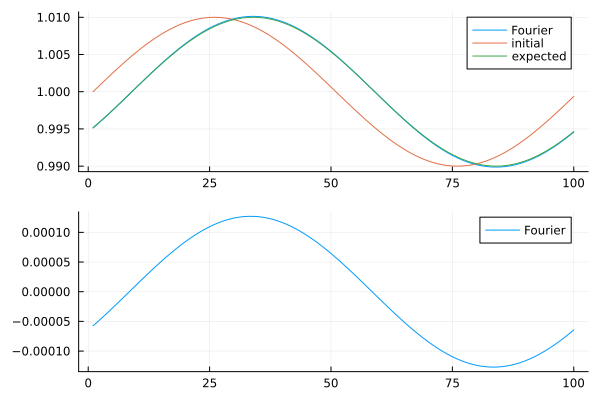

In [ ]:
f = copy(f₀)

for i in 1:10
    mul!(F, PF, v.*f)
    for i = eachindex(F)
        F[i] = im * k[i] * F[i]
    end
    mul!(g, Pg, F)
    f = f - Δt*g
end

p1 = plot(f, label = "Fourier")
plot!(p1, f₀, label = "initial")
plot!(p1,  f₁, label = "expected")

p2 = plot(f - f₁, label = "Fourier")

p = plot(p1, p2,
    layout = @layout [a; b]
)

$$
f_n^{m+1/2} = f_n^m - \frac{h}{2}F_n\{f^m\}
$$
$$
f_n^{m+1} = f_n^m - \frac{h}{2}F_n\{f^{m+1/2}\}
$$

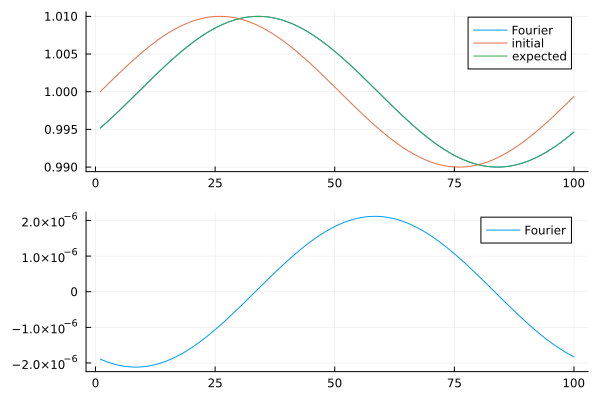

In [ ]:
f = copy(f₀)
f_ = similar(f₀)

for i in 1:10
    mul!(F, PF, v.*f)
    for i = eachindex(F)
        F[i] = im * k[i] * F[i]
    end
    mul!(g, Pg, F)
    f_ = f - 0.5*Δt*g
    mul!(F, PF, v.*f_)
    for i = eachindex(F)
        F[i] = im * k[i] * F[i]
    end
    mul!(g, Pg, F)
    f = f - Δt*g
end

p1 = plot(f, label = "Fourier")
plot!(p1, f₀, label = "initial")
plot!(p1,  f₁, label = "expected")

p2 = plot(f - f₁, label = "Fourier")

p = plot(p1, p2,
    layout = @layout [a; b]
)

In [ ]:
Δx = 0.01
Δt = 0.6*Δx
v = 1.0

f₀ = [exp(-((i*Δx - 0.2)/0.05)^2) for i = 0:100]

PF = FFTW.plan_rfft(f₀)
F = FFTW.rfft(f₀)
k = collect(2π*rfftfreq(length(f₀)))/Δx
Pg = FFTW.plan_irfft(F, length(f₀))
g = FFTW.irfft(F, length(f₀));

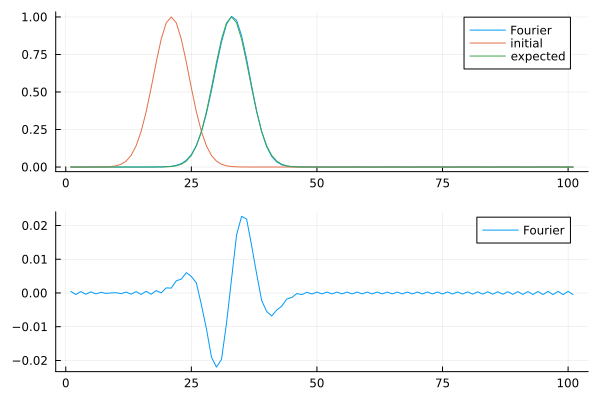

In [ ]:
f₁ = [exp(-((i*Δx - 20*v*Δt - 0.2)/0.05)^2) for i = 0:100]

f = copy(f₀)
f_ = similar(f₀)

for i in 1:20
    mul!(F, PF, v.*f)
    for i = eachindex(F)
        F[i] = im * k[i] * F[i]
    end
    mul!(g, Pg, F)
    f_ = f - 0.5*Δt*g
    mul!(F, PF, v.*f_)
    for i = eachindex(F)
        F[i] = im * k[i] * F[i]
    end
    mul!(g, Pg, F)
    f = f - Δt*g
end

p1 = plot(f, label = "Fourier")
plot!(p1, f₀, label = "initial")
plot!(p1,  f₁, label = "expected")

p2 = plot(f - f₁, label = "Fourier")

p = plot(p1, p2,
    layout = @layout [a; b]
)

Увеличим время расчёта

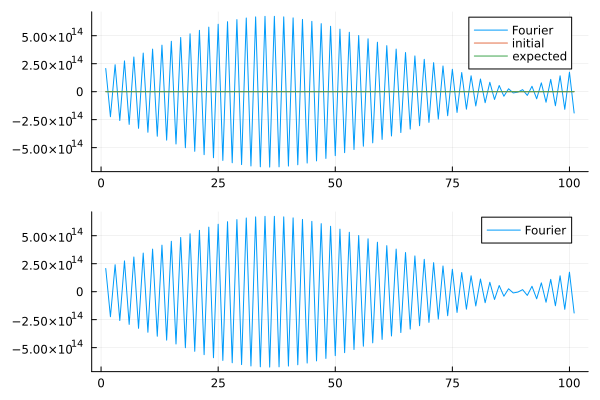

In [ ]:
f = copy(f₀)

for i in 1:80
    mul!(F, PF, v.*f)
    for i = eachindex(F)
        F[i] = im * k[i] * F[i]
    end
    mul!(g, Pg, F)
    f_ = f - 0.5*Δt*g
    mul!(F, PF, v.*f_)
    for i = eachindex(F)
        F[i] = im * k[i] * F[i]
    end
    mul!(g, Pg, F)
    f = f - Δt*g
end

p1 = plot(f, label = "Fourier")
plot!(p1, f₀, label = "initial")
plot!(p1,  f₁, label = "expected")

p2 = plot(f - f₁, label = "Fourier")

p = plot(p1, p2,
    layout = @layout [a; b]
)

Уменьшим временной шаг в 4 раза

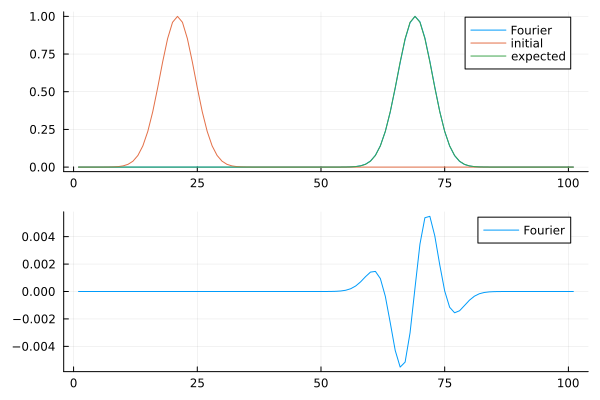

In [ ]:
Δt = 0.15*Δx

f = copy(f₀)

for i in 1:320
    mul!(F, PF, v.*f)
    for i = eachindex(F)
        F[i] = im * k[i] * F[i]
    end
    mul!(g, Pg, F)
    f_ = f - 0.5*Δt*g
    mul!(F, PF, v.*f_)
    for i = eachindex(F)
        F[i] = im * k[i] * F[i]
    end
    mul!(g, Pg, F)
    f = f - Δt*g
end

p1 = plot(f, label = "Fourier")
plot!(p1, f₀, label = "initial")
plot!(p1,  f₁, label = "expected")

p2 = plot(f - f₁, label = "Fourier")

p = plot(p1, p2,
    layout = @layout [a; b]
)

Можно также вводить фильтрацию высоких частот, но чаще используют более сложные (неявные) схемы для интегирования по времени

## Метод конечных элементов

* Для области моделирования вводится произвольная сетка (обычно используется триангуляция)
 * Можно моделировать течения в сложных границах
 * Можно увеличивать разрешение сетки в нужных областях
 * Можно менять разрешение сетки (адаптировать) в ходе вычислений

* Формально близок к спектральным, но используется разложение по локальным функциям, в простейшем случае кусочно-линейным:
$$
\phi_n(x) = \left\{
\begin{array}{ll}
\frac{x-x_{k-1}}{x_k-x_{k-1}} & x \in [x_{k-1}, x_k]\\
\frac{x_{k+1}-x}{x_{k+1}-x_k} & x \in [x_k, x_{k+1}]\\
0 & x \notin [x_{k-1}, x_{k+1}]
\end{array}\right.
$$

* Конечными элементами называют как элементы сетки, так и базисные функции

### Слабая форма уравнения

* Запишем уравнение в дивергентной форме:
$$
\frac{\partial f}{\partial t} + \frac{\partial (vf)}{\partial x} = 0
$$

* Это сильная (исходная) форма уравнения. Домножим на произвольную функцию $u(x)$, равную нулю на границе и проинтегрируем:
$$
\int_\Omega u(x)\frac{\partial f(x,t)}{\partial t} dx + \int_\Omega u(x) \frac{\partial (v(x)f(x))}{\partial x} dx = 0
$$

$$
\int_\Omega u(x)\frac{\partial f(x,t)}{\partial t} dx - \int_{\partial\Omega} u(x) v(x)f(x) dx + \int_\Omega \frac{du(x)}{dx} v(x)f(x) dx = 0
$$

$$
\int_\Omega \left( u(x)\frac{\partial f(x,t)}{\partial t} + \frac{du(x)}{dx} v(x)f(x)\right) dx = 0
$$

* Это слабая форма уравнения. Оно содержит все решения сильной формы, а также множество негладких решений.

### Свойства базисных функций

$$
\int \phi_n(x)\phi_k(x) dx = \left\{
\begin{array}{ll}
\frac{1}{3}(x_{k+1}-x_{k-1}) & n-k=0\\
\frac{1}{6}|x_n-x_k| & |n-k|=1\\
0 & |n-k| > 1
\end{array}\right.
$$

$$
\int \phi^\prime_n(x)\phi_k(x) dx = \left\{
\begin{array}{ll}
1 & n-k=0\\
\frac{1}{2}\rm{sign}[n-k] & |n-k|=1\\
0 & |n-k| > 1
\end{array}\right.
$$

### Дискретизация

$$
f(x,t) = \sum g_k(t)\phi_k(x)
$$

$$
v(x)f(x,t) = \sum u_k(t)\phi_k(x)
$$

$$
\int_\Omega \left( \phi_n(x)\frac{\partial f(x,t)}{\partial t} + \frac{d\phi_n(x)}{dx} v(x)f(x,t)\right) dx = 0
$$

$$
\sum \dot g_k\int\phi_n\phi_k dx + \sum u_k\int\phi^\prime_n\phi_k dx = 0
$$

$$
\hat A \dot g = \hat B u
$$

### Примечания

* Фактически, используется метод Галёркина

* Можно использовать базисные функции, не равные нулю на границе элемента, (разрывный метод Галёркина) — требуется вычисление потоков на границе элементов

* Базисные функции можно представлять как непересекающиеся суперпозиции нескольких многочленов (например, Лежандра)

* Точность можно увеличивать как уменьшением размера элемента, так и увеличением степени многочлена

* Метод конечных элементов удобен для построения универсальных решателей и поэтому широко распространён в коммерческих продуктах. Пример проекта с открытым кодом: FEniCS (https://fenicsproject.org). Недостаток: специализированный решатель можно сильнее оптимизировать

## Литература

### Спектральные методы

* S. Gottlieb, D. Gottlieb. Spectral methods // Scholarpedia. doi:10.4249/scholarpedia.7504
* J. P. Boyd. _Chebyshev and Fourier Spectral Methods_. 2000
* S. Le Bourdiec, F. de Vuyst, L. Jacquet. _Numerical solution of the Vlasov–Poisson system using generalized Hermite functions_ // Computer Physics Communication, 175, 528—544 (2006)

### Метод конечных элементов

* J. Tinsley Oden. _Finite element method_ // Scholarpedia. doi:10.4249/scholarpedia.9836

## Дома

* Выписать общий вид функций Эрмита
* Доказать основные свойства функций Эрмита